In [1]:
import pandas as pd

# `df.pivot()`

- Allows you to **reshape** (pivot) a dataframe.

- `index` argument: column you want on rows.

- `columns` argument: the list of columns in the new dataframe.

- `values` argument: list of columns to be present in the resulting dataframe.

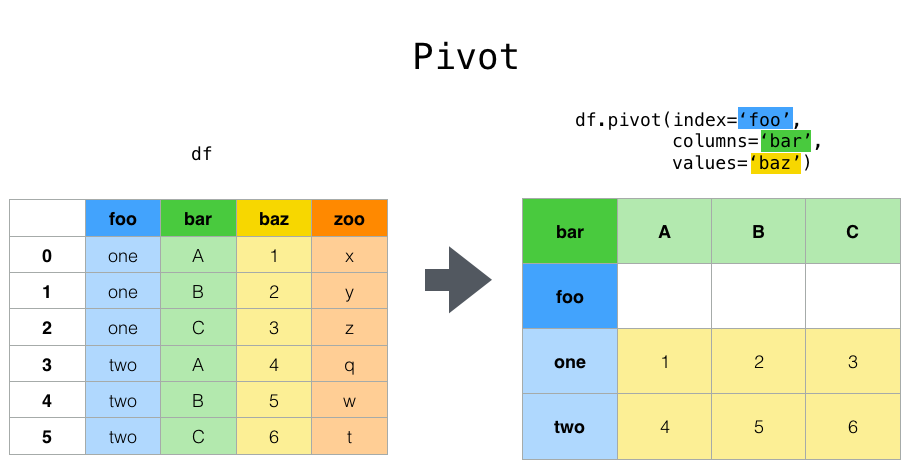

In [2]:
df = pd.read_csv('data/weather_pivot_1.csv')
df

,date,city,temperature,humidity
0,5/1/2017,new york,65,56
1,5/2/2017,new york,66,58
2,5/3/2017,new york,68,60
3,5/1/2017,mumbai,75,80
4,5/2/2017,mumbai,78,83
5,5/3/2017,mumbai,82,85
6,5/1/2017,beijing,80,26
7,5/2/2017,beijing,77,30
8,5/3/2017,beijing,79,35


In [4]:
df.pivot(index='city', columns='temperature')

date                                                    \
temperature        65        66        68        75        77        78   
city                                                                      
beijing           NaN       NaN       NaN       NaN  5/2/2017       NaN   
mumbai            NaN       NaN       NaN  5/1/2017       NaN  5/2/2017   
new york     5/1/2017  5/2/2017  5/3/2017       NaN       NaN       NaN   

                                          humidity                          \
temperature        79        80        82       65    66    68    75    77   
city                                                                         
beijing      5/3/2017  5/1/2017       NaN      NaN   NaN   NaN   NaN  30.0   
mumbai            NaN       NaN  5/3/2017      NaN   NaN   NaN  80.0   NaN   
new york          NaN       NaN       NaN     56.0  58.0  60.0   NaN   NaN   

                                     
temperature    78    79    80    82  
city                                 
beijing       NaN  35.0  26.0   NaN  
mumbai       83.0   NaN   NaN  85.0  
new york      NaN   NaN   NaN   NaN

In [5]:
df.pivot(index='city', columns='humidity')

date                                                    \
humidity        26        30        35        56        58        60   
city                                                                   
beijing   5/1/2017  5/2/2017  5/3/2017       NaN       NaN       NaN   
mumbai         NaN       NaN       NaN       NaN       NaN       NaN   
new york       NaN       NaN       NaN  5/1/2017  5/2/2017  5/3/2017   

                                       temperature                          \
humidity        80        83        85          26    30    35    56    58   
city                                                                         
beijing        NaN       NaN       NaN        80.0  77.0  79.0   NaN   NaN   
mumbai    5/1/2017  5/2/2017  5/3/2017         NaN   NaN   NaN   NaN   NaN   
new york       NaN       NaN       NaN         NaN   NaN   NaN  65.0  66.0   

                                  
humidity    60    80    83    85  
city                              
beijing    NaN   NaN   NaN   NaN  
mumbai     NaN  75.0  78.0  82.0  
new york  68.0   NaN   NaN   NaN

## `df.pivot_table()`

- Allows you to summarize and aggregate tabular data.

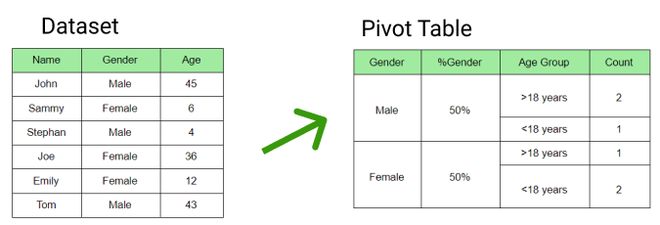

- Consider the following dataset:

In [6]:
df = pd.read_csv('data/weather_pivot_2.csv')
df

,date,city,temperature,humidity
0,5/1/2017,new york,65,56
1,5/1/2017,new york,61,54
2,5/2/2017,new york,70,60
3,5/2/2017,new york,72,62
4,5/1/2017,mumbai,75,80
5,5/1/2017,mumbai,78,83
6,5/2/2017,mumbai,82,85
7,5/2/2017,mumbai,80,26


- Observe that for the same date, there are two records for the same city.

- We might want to aggregate that into a single record, having the average temperature, average humidity (for example).

- `index` argument: column(s) to be present as indices (in rows).

- `columns` argument: column(s) to be present in the new dataframe.

- `aggfunc` argument: aggregation function to use, default is `numpy.mean`.

In [10]:
df.pivot_table(index='city', columns='date')

humidity          temperature         
date     5/1/2017 5/2/2017    5/1/2017 5/2/2017
city                                           
mumbai       81.5     55.5        76.5     81.0
new york     55.0     61.0        63.0     71.0

In [11]:
# using a custom aggregate function
df.pivot_table(index='city', columns='date', aggfunc='min')

humidity          temperature         
date     5/1/2017 5/2/2017    5/1/2017 5/2/2017
city                                           
mumbai         80       26          75       80
new york       54       60          61       70

### Grouper in `pivot_table()`

- Consider the following dataset:

In [12]:
df = pd.read_csv('data/weather_pivot_3.csv')
df

,date,city,temperature,humidity
0,5/1/2017,new york,65,56
1,5/2/2017,new york,61,54
2,5/3/2017,new york,70,60
3,12/1/2017,new york,30,50
4,12/2/2017,new york,28,52
5,12/3/2017,new york,25,51


- Grouper can be used to aggregate based on data frequency.

    - For example, monthly average temperature.

In [13]:
df['date'] = pd.to_datetime(df['date'])

In [14]:
# get montly average temperature and humidity
df.pivot_table(index=pd.Grouper(freq='M', key='date'), columns='city')

,humidity,temperature
city,new york,new york
date,,
2017-05-31,56.666667,65.333333
2017-12-31,51.000000,27.666667
